<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">
 
# Natural Language Processing
 
_Authors: Kiefer Katovich (San Francisco), Joseph Nelson (Washington, D.C.)_
 
---


### Learning Objectives
- Discuss the major tasks involved with natural language processing.
- Discuss, on a low level, the components of natural language processing.
- Identify why natural language processing is difficult.
- Demonstrate text classification.
- Demonstrate common text preprocessing techniques.

### How Do We Use NLP in Data Science?

In data science, we are often asked to analyze unstructured text or make a predictive model using it. Unfortunately, most data science techniques require numeric data. NLP libraries provide a tool set of methods to convert unstructured text into meaningful numeric data.

- **Analysis:** NLP techniques provide tools to allow us to understand and analyze large amounts of text. For example:

    - Analyze the positivity/negativity of comments on different websites. 
    - Extract key words from meeting notes and visualize how meeting topics change over time.

- **Vectorizing for machine learning:** When building a machine learning model, we typically must transform our data into numeric features. This process of transforming non-numeric data such as natural language into numeric features is called vectorization. For example:

    - Understanding related words. Using stemming, NLP lets us know that "swim", "swims", and "swimming" all refer to the same base word. This allows us to reduce the number of features used in our model.
    - Identifying important and unique words. Using TF-IDF (term frequency-inverse document frequency), we can identify which words are most likely to be meaningful in a document.

<a id='textblob_install'></a>

### Install TextBlob

The TextBlob Python library provides a simplified interface for exploring common NLP tasks including part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

To proceed with the lesson, first install TextBlob, as explained below. We tend to prefer Anaconda-based installations, since they tend to be tested with our other Anaconda packages.

**To install textblob run:**

> `conda install -c conda-forge textblob`

**Or:**

> `pip install textblob`

> `python -m textblob.download_corpora lite`

In [2]:
#! pip install textblob
#! python -m textblob.download_corpora lite

## Lesson Guide

- [Introduction to Natural Language Processing](#intro)
- [Reading Yelp reviews With NLP](#yelp_rev)
- [Text Classification](#text_class)
- [Count Vectorization](#count_vec)
    - [Using CountVectorizer in a Model](#countvectorizer-model)
    - [N-Grams](#ngrams)
    - [Stop-Word Removal](#stopwords)
	- [Count Vector Options](#cvec_opt)
- [Intro to TextBlob](#textblob)
	- [Stemming and Lemmatization](#stem)
- [Term Frequency–Inverse Document Frequency Vectorization](#tfidf)
	- [Yelp Summary Using TF–IDF](#yelp_tfidf)
- [Sentiment Analysis](#sentiment)
- [BONUS: Adding Features to a Document-Term Matrix](#add_feat)
- [BONUS: More TextBlob Features](#more_textblob)
- [APPENDIX: Intro to Naive Bayes and Text Classification](#bayes)
- [Conclusion](#conclusion)

<a id='intro'></a>

## Introduction

*Adapted from [NLP Crash Course](http://files.meetup.com/7616132/DC-NLP-2013-09%20Charlie%20Greenbacker.pdf) by Charlie Greenbacker and [Introduction to NLP](http://spark-public.s3.amazonaws.com/nlp/slides/intro.pdf) by Dan Jurafsky*

## Introduction

### What Is Natural Language Processing (NLP)?

- Using computers to process (analyze, understand, generate) natural human languages.
- Making sense of human knowledge stored as unstructured text.
- Building probabilistic models using data about a language.

### What Are Some of the Higher-Level Task Areas?

- **Objective:** Discuss the major tasks involved with natural language processing.

We often hope that computers can solve many high-level problems involving natural language. Unfortunately, due to the difficulty of understanding human language, many of these problems are still not well solved. That said, existing solutions to these problems all involve utilizing the lower-level components of NLP discussed in the next section. Some higher-level tasks include:

- **Chatbots:** Understand natural language from the user and return intelligent responses.
    - [Api.ai](https://api.ai/)
- **Information retrieval:** Find relevant results and similar results.
    - [Google](https://www.google.com/)    
- **Information extraction:** Structured information from unstructured documents.
    - [Events from Gmail](https://support.google.com/calendar/answer/6084018?hl=en)
- **Machine translation:** One language to another.
    - [Google Translate](https://translate.google.com/)
- **Text simplification:** Preserve the meaning of text, but simplify the grammar and vocabulary.
    - [Rewordify](https://rewordify.com/)
    - [Simple English Wikipedia](https://simple.wikipedia.org/wiki/Main_Page)
- **Predictive text input:** Faster or easier typing.
    - [Phrase completion application](https://justmarkham.shinyapps.io/textprediction/)
    - [A much better application](https://farsite.shinyapps.io/swiftkey-cap/)
- **Sentiment analysis:** Attitude of speaker.
    - [Hater News](https://medium.com/@KevinMcAlear/building-hater-news-62062c58325c)
- **Automatic summarization:** Extractive or abstractive summarization.
    - [autotldr](https://www.reddit.com/r/technology/comments/35brc8/21_million_people_still_use_aol_dialup/cr2zzj0)
- **Natural language generation:** Generate text from data.
    - [How a computer describes a sports match](http://www.bbc.com/news/technology-34204052)
    - [Publishers withdraw more than 120 gibberish papers](http://www.nature.com/news/publishers-withdraw-more-than-120-gibberish-papers-1.14763)
- **Speech recognition and generation:** Speech-to-text, text-to-speech.
    - [Google's Web Speech API demo](https://www.google.com/intl/en/chrome/demos/speech.html)
    - [Vocalware Text-to-Speech demo](https://www.vocalware.com/index/demo)
- **Question answering:** Determine the intent of the question, match query with knowledge base, evaluate hypotheses.
    - [How did supercomputer Watson beat Jeopardy champion Ken Jennings?](http://blog.ted.com/how-did-supercomputer-watson-beat-jeopardy-champion-ken-jennings-experts-discuss/)
    - [IBM's Watson Trivia Challenge](http://www.nytimes.com/interactive/2010/06/16/magazine/watson-trivia-game.html)
    - [The AI Behind Watson](http://www.aaai.org/Magazine/Watson/watson.php)

### What Are Some of the Lower-Level Components?

- **Objective:** Discuss, on a low level, the components of natural language processing.

Unfortunately, the NLP programming libraries typically do not provide direct solutions for the high-level tasks above. Instead, they provide low-level building blocks that enable us to craft our own solutions. These include:

- **Tokenization:** Breaking text into tokens (words, sentences, n-grams)
- **Stop-word removal:** a/an/the
- **Stemming and lemmatization:** root word
- **TF-IDF:** word importance
- **Part-of-speech tagging:** noun/verb/adjective
- **Named entity recognition:** person/organization/location
- **Spelling correction:** "New Yrok City"
- **Word sense disambiguation:** "buy a mouse"
- **Segmentation:** "New York City subway"
- **Language detection:** "translate this page"
- **Machine learning:** specialized models that work well with text

### Why is NLP hard?

- **Objective:** Identify why natural language processing is difficult.

Natural language processing requires an understanding of the language and the world. Several limitations of NLP are:

- **Ambiguity**:
    - Hospitals Are Sued by 7 Foot Doctors
    - Juvenile Court to Try Shooting Defendant
    - Local High School Dropouts Cut in Half
- **Non-standard English:** text messages
- **Idioms:** "throw in the towel"
- **Newly coined words:** "retweet"
- **Tricky entity names:** "Where is A Bug's Life playing?"
- **World knowledge:** "Mary and Sue are sisters", "Mary and Sue are mothers"

<a id='yelp_rev'></a>

## Reading in the Yelp Reviews

Throughout this lesson, we will use Yelp reviews to practice and discover common low-level NLP techniques.

You should be familiar with these terms, as they are frequently used in NLP:
- **corpus**: a collection of documents (derived from the Latin word for "body")
- **corpora**: plural form of corpus

Throughout this lesson, we will use a model very popular for text classification called Naive Bayes (the "NB" in `BinonmialNB` and `MultinomialNB` below). If you are unfamiliar with it, know that it works exactly the same as all other models in scikit-learn! We will look extensively at the mechanics behind Naive Bayes later in the course. However, see the [appendix](#bayes) at the end of this notebook for a quick introduction.

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB         # Naive Bayes
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

In [53]:
# Read yelp.csv into a DataFrame.
path = r'./data/yelp.csv'
yelp = pd.read_csv(path)
# The yelp dataframe has 10,000 records or documents
print(len(yelp))
# Create a new DataFrame that only contains the 5-star and 1-star reviews.
yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]

# Define X and y. worst and best account for 4086 out of 10,000 documents 
X = yelp_best_worst.text
y = yelp_best_worst.stars
print(len(X), len(y))
print(X.dtypes, y.dtypes)
# Split the new DataFrame into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

10000
4086 4086
object int64


In [3]:
# The head of the original data
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
yelp_best_worst.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4


In [17]:
# look at the random index the train-test-split found from the DataFrame
print(X_train.dtypes)
X_train.head()

object


6841    FILLY-B's!!!!!  only 8 reviews?? NINE now!!!\r...
1728    My husband and I absolutely LOVE this restaura...
3853    We went today after lunch. I got my usual of l...
671     Totally dissapointed.  I had purchased a coupo...
4920    Costco Travel - My husband and I recently retu...
Name: text, dtype: object

<a id='text_class'></a>


# Introduction: Text Classification

As you proceed through this section, note that text classification is done in the same way as all other classification models. First, the text is vectorized into a set of numeric features. Then, a standard machine learning classifier is applied. NLP libraries often include vectorizers and ML models that work particularly well with text.

> We will refer to each piece of text we are trying to classify as a document.
> - For example, a document could refer to an email, book chapter, tweet, article, or text message.

**Text classification is the task of predicting which category or topic a text sample is from.**

We may want to identify:
- Is an article a sports or business story?
- Does an email have positive or negative sentiment?
- Is the rating of a recipe 1, 2, 3, 4, or 5 stars?

**Predictions are often made by using the words as features and the label as the target output.**

Starting out, we will make each unique word (across all documents) a single feature. In any given corpora, we may have hundreds of thousands of unique words, so we may have hundreds of thousands of features!

- For a given document, the numeric value of each feature could be the number of times the word appears in the document.
    - So, most features will have a value of zero, resulting in a sparse matrix of features.

- This technique for vectorizing text is referred to as a bag-of-words model. 
    - It is called bag of words because the document's structure is lost — as if the words are all jumbled up in a bag.
    - The first step to creating a bag-of-words model is to create a vocabulary of all possible words in the corpora.

> Alternatively, we could make each column an indicator column, which is 1 if the word is present in the document (no matter how many times) and 0 if not. This vectorization could be used to reduce the importance of repeated words. For example, a website search engine would be susceptible to spammers who load websites with repeated words. So, the search engine might use indicator columns as features rather than word counts.

**We need to consider several things to decide if bag-of-words is appropriate.**

- Does order of words matter?
- Does punctuation matter?
- Does upper or lower case matter?

## Demo: Text Processing in scikit-learn

- **Objective:** Demonstrate text classification.

<a id='count_vec'></a>


### Creating Features Using CountVectorizer

- **What:** Converts each document into a set of words and their counts.
- **Why:** To use a machine learning model, we must convert unstructured text into numeric features.
- **Notes:** Relatively easy with English language text, not as easy with some languages.

In [31]:
# Use CountVectorizer to create document-term matrices from X_train and X_test.
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [14]:
# Rows are documents, columns are terms (aka "tokens" or "features", individual words in this situation).
print(X_train_dtm.shape)
print(X_test_dtm.shape)

(3064, 16825)
(1022, 16825)


In [8]:
# Last 50 features or column names or words
print((vect.get_feature_names()[-50:]))

['yyyyy', 'z11', 'za', 'zabba', 'zach', 'zam', 'zanella', 'zankou', 'zappos', 'zatsiki', 'zen', 'zero', 'zest', 'zexperience', 'zha', 'zhou', 'zia', 'zihuatenejo', 'zilch', 'zin', 'zinburger', 'zinburgergeist', 'zinc', 'zinfandel', 'zing', 'zip', 'zipcar', 'zipper', 'zippers', 'zipps', 'ziti', 'zoe', 'zombi', 'zombies', 'zone', 'zones', 'zoning', 'zoo', 'zoyo', 'zucca', 'zucchini', 'zuchinni', 'zumba', 'zupa', 'zuzu', 'zwiebel', 'zzed', 'éclairs', 'école', 'ém']


In [9]:
# Show vectorizer options.
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [32]:
# by default every word converts to feature in lower case
x_dtm = pd.DataFrame(X_train_dtm.toarray(), columns=vect.get_feature_names())
x_dtm[['sucks','to','the','cool','like','super','look']].tail(30)

,sucks,to,the,cool,like,super,look
3034,0,7,14,0,1,0,0
3035,0,1,2,0,0,1,0
3036,0,1,0,0,0,0,0
3037,0,0,0,0,0,0,0
3038,0,0,2,0,0,0,0
3039,0,1,1,0,0,0,0
3040,0,5,5,0,0,0,0
3041,0,5,5,0,2,0,0
3042,0,2,4,0,0,0,0
3043,0,0,1,0,0,0,0


[CountVectorizer documentation](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

One common method of reducing the number of features is converting all text to lowercase before generating features! Note that to a computer, `aPPle` is a different token/"word" than `apple`. So, by converting both to lowercase letters, it ensures fewer features will be generated. It might be useful not to convert them to lowercase if capitalization matters.

In [23]:
# Don't convert to lowercase.
vect = CountVectorizer(lowercase=False)
X_train_dtm = vect.fit_transform(X_train)
print(X_train_dtm.shape)
# the countvectorizer converts object(string) to scipy sparse matrix with integers 
print(type(X_train_dtm))
vect.get_feature_names()[-10:]

(3064, 20838)
<class 'scipy.sparse.csr.csr_matrix'>


['zoning',
 'zoo',
 'zucchini',
 'zuchinni',
 'zupa',
 'zwiebel',
 'zzed',
 'École',
 'éclairs',
 'ém']

<a id='countvectorizer-model'></a>


### Using CountVectorizer in a Model
![DTM](images/DTM.png)

In [24]:
# Use default options for CountVectorizer.
vect = CountVectorizer()

# Create document-term matrices.
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
print(type(X_test_dtm))
# Use Naive Bayes to predict the star rating.
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

# Calculate accuracy.
print((metrics.accuracy_score(y_test, y_pred_class)))

<class 'scipy.sparse.csr.csr_matrix'>
0.9187866927592955


In [83]:
y_test.value_counts()

5    838
1    184
Name: stars, dtype: int64

In [16]:
# Calculate null accuracy. which is the baseline accuracy
y_test_binary = np.where(y_test==5, 1, 0) # five stars become 1, one stars become 0
print('Percent 5 Stars:', y_test_binary.mean())
print('Percent 1 Stars:', 1 - y_test_binary.mean())

Percent 5 Stars: 0.8199608610567515
Percent 1 Stars: 0.18003913894324852


Our model predicted ~92% accuracy, which is an improvement over this baseline 82% accuracy (assuming our model always predicts 5 stars).

Let's look more into how the vectorizer works.

In [21]:
# Notice how the data was transformed into this sparse matrix with 1,022 datapoints and 16,825 features!
#   - Recall that vectorizations of text will be mostly zeros, since only a few unique words are in each document.
#   - For that reason, instead of storing all the zeros we only store non-zero values (inside the 'sparse matrix' data structure!).
#   - We have 3064 Yelp reviews in our training set.
#   - 16,825 unique words were found across all documents.

X_train_dtm

<3064x16825 sparse matrix of type '<class 'numpy.int64'>'
	with 237720 stored elements in Compressed Sparse Row format>

In [86]:
# Let's take a look at the vocabulary that was generated, containing 16,825 unique words.
#   'vocabulary_' is a dictionary that converts each word to its index in the sparse matrix.
#   - For example, the word "four" is index #3230 in the sparse matrix.

vect.vocabulary_

{u'mustachio': 9857,
 u'foul': 6081,
 u'four': 6089,
 u'bigee': 1706,
 u'woods': 16570,
 u'hanging': 6939,
 u'francesca': 6108,
 u'comically': 3246,
 u'increase': 7664,
 u'canes': 2456,
 u'shuro': 13415,
 u'originality': 10463,
 u'demoted': 4263,
 u'sinking': 13497,
 u'naturopathic': 9940,
 u'propane': 11679,
 u'eggrolls': 5029,
 u'tantalizing': 14789,
 u'leisurely': 8600,
 u'avondale': 1266,
 u'bringing': 2126,
 u'basics': 1476,
 u'wooden': 16568,
 u'wednesday': 16325,
 u'broiled': 2149,
 u'stereotypical': 14231,
 u'commented': 3254,
 u'specially': 13940,
 u'preface': 11471,
 u'272': 151,
 u'sustaining': 14624,
 u'scraped': 13031,
 u'lucious': 8928,
 u'errors': 5265,
 u'relieving': 12243,
 u'tiered': 15163,
 u'thunder': 15141,
 u'cooking': 3561,
 u'fossil': 6078,
 u'designing': 4328,
 u'marching': 9131,
 u'groupie': 6766,
 u'shocks': 13343,
 u'china': 2891,
 u'wagyu': 16175,
 u'affiliated': 550,
 u'chino': 2895,
 u'wiseguy': 16518,
 u'natured': 9938,
 u'kids': 8288,
 u'robata': 12589,

In [26]:
# Finally, let's convert the scipy sparse matrix to a typical numpy ndarray using .toarray()
#   - Remember, this takes up a lot more memory than the sparse matrix! However, this conversion is sometimes necessary.
print(type(X_test_dtm.toarray()))
X_test_dtm.toarray()

<class 'numpy.ndarray'>


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [27]:
# We will use this function below for simplicity.

# Define a function that accepts a vectorizer and calculates the accuracy.
def tokenize_test(vect):
    X_train_dtm = vect.fit_transform(X_train)
    print(('Features: ', X_train_dtm.shape[1]))
    X_test_dtm = vect.transform(X_test)
    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)
    print(('Accuracy: ', metrics.accuracy_score(y_test, y_pred_class)))

In [28]:
# min_df ignores words that occur less than twice ('df' means "document frequency").
vect = CountVectorizer(min_df=2, max_features=10000)
tokenize_test(vect)

('Features: ', 8783)
('Accuracy: ', 0.9246575342465754)


Let's take a look next at other ways of preprocessing text!

- **Objective:** Demonstrate common text preprocessing techniques.

<a id='ngrams'></a>
### N-Grams

N-grams are features which consist of N consecutive words. This is useful because using the bag-of-words model, treating `data scientist` as a single feature has more meaning than having two independent features `data` and `scientist`!

Example:
```
my cat is awesome
Unigrams (1-grams): 'my', 'cat', 'is', 'awesome'
Bigrams (2-grams): 'my cat', 'cat is', 'is awesome'
Trigrams (3-grams): 'my cat is', 'cat is awesome'
4-grams: 'my cat is awesome'
```

- **ngram_range:** tuple (min_n, max_n)
- The lower and upper boundary of the range of n-values for different n-grams to be extracted. All values of n such that min_n <= n <= max_n will be used.

In [34]:
# Include 1-grams and 2-grams.
vect = CountVectorizer(ngram_range=(1, 2))
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape

(3064, 169847)

We can start to see how supplementing our features with n-grams can lead to more feature columns. When we produce n-grams from a document with $W$ words, we add an additional $(n-W+1)$ features (at most). That said, be careful — when we compute n-grams from an entire corpus, the number of _unique_ n-grams could be vastly higher than the number of _unique_ unigrams! This could cause an undesired feature explosion.

Although we sometimes add important new features that have meaning such as `data scientist`, many of the new features will just be noise. So, particularly if we do not have much data, adding n-grams can actually decrease model performance. This is because if each n-gram is only present once or twice in the training set, we are effectively adding mostly noisy features to the mix.

In [35]:
# Last 50 features
print((vect.get_feature_names()[-50:]))

['zone out', 'zone when', 'zones', 'zones dolls', 'zoning', 'zoning issues', 'zoo', 'zoo and', 'zoo is', 'zoo not', 'zoo the', 'zoo ve', 'zoyo', 'zoyo for', 'zucca', 'zucca appetizer', 'zucchini', 'zucchini and', 'zucchini bread', 'zucchini broccoli', 'zucchini carrots', 'zucchini fries', 'zucchini pieces', 'zucchini strips', 'zucchini veal', 'zucchini very', 'zucchini with', 'zuchinni', 'zuchinni again', 'zuchinni the', 'zumba', 'zumba class', 'zumba or', 'zumba yogalates', 'zupa', 'zupa flavors', 'zuzu', 'zuzu in', 'zuzu is', 'zuzu the', 'zwiebel', 'zwiebel kräuter', 'zzed', 'zzed in', 'éclairs', 'éclairs napoleons', 'école', 'école lenôtre', 'ém', 'ém all']


<a id='stopwords'></a>

### Stop-Word Removal

- **What:** This process is used to remove common words that will likely appear in any text.
- **Why:** Because common words exist in most documents, they likely only add noise to your model and should be removed.

**What are stop words?**
Stop words are some of the most common words in a language. They are used so that a sentence makes sense grammatically, such as prepositions and determiners, e.g., "to," "the," "and." However, they are so commonly used that they are generally worthless for predicting the class of a document. Since "a" appears in spam and non-spam emails, for example, it would only contribute noise to our model.

Example: 

> 1. Original sentence: "The dog jumped over the fence"  
> 2. After stop-word removal: "dog jumped over fence"

The fact that there is a fence and a dog jumped over it can be derived with or without stop words.

In [36]:
# Show vectorizer options.
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

- **stop_words:** string {`english`}, list, or None (default)
- If `english`, a built-in stop word list for English is used.
- If a list, that list is assumed to contain stop words, all of which will be removed from the resulting tokens.
- If None, no stop words will be used. `max_df` can be set to a value in the range [0.7, 1.0) to automatically detect and filter stop words based on intra corpus document frequency of terms. (If `max_df` = 0.7, then if > 70% of documents contain a word it will not be included in the feature set!)

In [37]:
# Remove English stop words.
vect = CountVectorizer(stop_words='english')
tokenize_test(vect)
vect.get_params()

('Features: ', 16528)
('Accuracy: ', 0.9158512720156555)


{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 1),
 'preprocessor': None,
 'stop_words': 'english',
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [38]:
# Set of stop words, in this case it is the english stop words
print((vect.get_stop_words()))

frozenset({'their', 'co', 'find', 'same', 'an', 'of', 'the', 'ie', 'a', 'without', 're', 'were', 'seeming', 'both', 'her', 'eg', 'seems', 'through', 'several', 'enough', 'she', 'indeed', 'couldnt', 'bottom', 'ltd', 'along', 'us', 'wherein', 'else', 'hers', 'fifty', 'am', 'thru', 'fifteen', 'third', 'during', 'now', 'too', 'already', 'sometimes', 'cannot', 'are', 'what', 'because', 'none', 'cry', 'yourselves', 'become', 'while', 'out', 'sometime', 'noone', 'do', 'etc', 'down', 'beside', 'after', 'yet', 'cant', 'ten', 'be', 'that', 'interest', 'becoming', 'much', 'then', 'detail', 'been', 'which', 'from', 'con', 'amoungst', 'hasnt', 'some', 'serious', 'any', 'herself', 'hereupon', 'toward', 'more', 'another', 'get', 'even', 'seemed', 'formerly', 'besides', 'hence', 'often', 'give', 'move', 'whereas', 'also', 'over', 'became', 'who', 'fire', 'as', 'about', 'throughout', 'eight', 'go', 'if', 'rather', 'or', 'empty', 'will', 'may', 'alone', 'i', 'few', 'itself', 'wherever', 'meanwhile', 'be

<a id='cvec_opt'></a>
### Other CountVectorizer Options

- `max_features`: int or None, default=None
- If not None, build a vocabulary that only consider the top `max_features` ordered by term frequency across the corpus. This allows us to keep more common n-grams and remove ones that may appear once. If we include words that only occur once, this can lead to said features being highly associated with a class and cause overfitting.

In [41]:
# Remove English stop words and only keep 100 features.
vect = CountVectorizer(stop_words='english', max_features=100)
tokenize_test(vect)

('Features: ', 100)
('Accuracy: ', 0.8698630136986302)


In [42]:
# All 100 features
print((vect.get_feature_names()))

['amazing', 'area', 'atmosphere', 'awesome', 'bad', 'bar', 'best', 'better', 'big', 'came', 'cheese', 'chicken', 'clean', 'coffee', 'come', 'day', 'definitely', 'delicious', 'did', 'didn', 'dinner', 'don', 'eat', 'excellent', 'experience', 'favorite', 'feel', 'food', 'free', 'fresh', 'friendly', 'friends', 'going', 'good', 'got', 'great', 'happy', 'home', 'hot', 'hour', 'just', 'know', 'like', 'little', 'll', 'location', 'long', 'looking', 'lot', 'love', 'lunch', 'make', 'meal', 'menu', 'minutes', 'need', 'new', 'nice', 'night', 'order', 'ordered', 'people', 'perfect', 'phoenix', 'pizza', 'place', 'pretty', 'prices', 'really', 'recommend', 'restaurant', 'right', 'said', 'salad', 'sandwich', 'sauce', 'say', 'service', 'staff', 'store', 'sure', 'table', 'thing', 'things', 'think', 'time', 'times', 'took', 'town', 'tried', 'try', 've', 'wait', 'want', 'way', 'went', 'wine', 'work', 'worth', 'years']


Just like with all other models, more features does not mean a better model. So, we must tune our feature generator to remove features whose predictive capability is none or very low.

In this case, there is roughly a 1.6% increase in accuracy when we double the n-gram size and increase our max features by 1,000-fold. Note that if we restrict it to only unigrams, then the accuracy increases even more! So, bigrams were very likely adding more noise than signal. 

In the end, by only using 16,000 unigram features we came away with a much smaller, simpler, and easier-to-think-about model which also resulted in higher accuracy.

In [41]:
# Include 1-grams and 2-grams, and limit the number of features.

print('1-grams and 2-grams, up to 100K features:')
vect = CountVectorizer(ngram_range=(1, 2), max_features=100000)
tokenize_test(vect)

print()
print('1-grams only, up to 100K features:')
vect = CountVectorizer(ngram_range=(1, 1), max_features=100000)
tokenize_test(vect)

1-grams and 2-grams, up to 100K features:
('Features: ', 100000)
('Accuracy: ', 0.8855185909980431)

1-grams only, up to 100K features:
('Features: ', 16825)
('Accuracy: ', 0.9187866927592955)


- `min_df`: Float in range [0.0, 1.0] or int, default=1
- When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. If float, the parameter represents a proportion of documents, integer absolute counts.

In [43]:
# Include 1-grams and 2-grams, and only include terms that appear at least two times.
vect = CountVectorizer(ngram_range=(1, 2), min_df=2)
tokenize_test(vect)

('Features: ', 43957)
('Accuracy: ', 0.9324853228962818)


In [44]:
# 16000 unigrams
vect = CountVectorizer(ngram_range=(1, 1), max_features=16000)
tokenize_test(vect)

('Features: ', 16000)
('Accuracy: ', 0.9187866927592955)


<a id='textblob'></a>
## Introduction to TextBlob

You should already have downloaded TextBlob, a Python library used to explore common NLP tasks. If you haven’t, please return to [this step](#textblob_install) for instructions on how to do so. We’ll be using this to organize our corpora for analysis.

As mentioned earlier, you can read more on the [TextBlob website](https://textblob.readthedocs.io/en/dev/).

In [45]:
# Print the first review.
print(type(yelp_best_worst.text))
print((yelp_best_worst.text[0]))

<class 'pandas.core.series.Series'>
My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


In [61]:
# Save it as a TextBlob object.
review = TextBlob(yelp_best_worst.text[0])

In [48]:
# List the words.
review.words

WordList(['My', 'wife', 'took', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', 'was', 'excellent', 'The', 'weather', 'was', 'perfect', 'which', 'made', 'sitting', 'outside', 'overlooking', 'their', 'grounds', 'an', 'absolute', 'pleasure', 'Our', 'waitress', 'was', 'excellent', 'and', 'our', 'food', 'arrived', 'quickly', 'on', 'the', 'semi-busy', 'Saturday', 'morning', 'It', 'looked', 'like', 'the', 'place', 'fills', 'up', 'pretty', 'quickly', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'Do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'Bloody', 'Mary', 'It', 'was', 'phenomenal', 'and', 'simply', 'the', 'best', 'I', "'ve", 'ever', 'had', 'I', "'m", 'pretty', 'sure', 'they', 'only', 'use', 'ingredients', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'It', 'was', 'amazing', 'While', 'EVERYTHING', 'on', 'the', 'menu', 'looks', 'excellent', 'I', 'had', 'the', 'white', 'truffle', 'scrambled', 'eggs', 

In [102]:
# List the sentences.
review.sentences

[Sentence("My wife took me here on my birthday for breakfast and it was excellent."),
 Sentence("The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure."),
 Sentence("Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning."),
 Sentence("It looked like the place fills up pretty quickly so the earlier you get here the better."),
 Sentence("Do yourself a favor and get their Bloody Mary."),
 Sentence("It was phenomenal and simply the best I've ever had."),
 Sentence("I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it."),
 Sentence("It was amazing."),
 Sentence("While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious."),
 Sentence("It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete."),
 Sentence("It was the best "toast" I've ever had."),


In [62]:
# Some string methods are available.
review.lower()

TextBlob("my wife took me here on my birthday for breakfast and it was excellent.  the weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  our waitress was excellent and our food arrived quickly on the semi-busy saturday morning.  it looked like the place fills up pretty quickly so the earlier you get here the better.

do yourself a favor and get their bloody mary.  it was phenomenal and simply the best i've ever had.  i'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  it was amazing.

while everything on the menu looks excellent, i had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  it came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  it was the best "toast" i've ever had.

anyway, i can't wait to go back!")

<a id='stem'></a>
## Stemming and Lemmatization

Stemming is a crude process of removing common endings from words, such as "s", "es", "ly", "ing", and "ed".

- **What:** Reduce a word to its base/stem/root form.
- **Why:** This intelligently reduces the number of features by grouping together (hopefully) related words.
- **Notes:**
    - Stemming uses a simple and fast rule-based approach.
    - Stemmed words are usually not shown to users (used for analysis/indexing).
    - Some search engines treat words with the same stem as synonyms.

In [49]:
# Initialize stemmer.
stemmer = SnowballStemmer('english')

# Stem each word. look for the truncation of the wors
print([stemmer.stem(word) for word in review.words])

['my', 'wife', 'took', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', 'was', 'excel', 'the', 'weather', 'was', 'perfect', 'which', 'made', 'sit', 'outsid', 'overlook', 'their', 'ground', 'an', 'absolut', 'pleasur', 'our', 'waitress', 'was', 'excel', 'and', 'our', 'food', 'arriv', 'quick', 'on', 'the', 'semi-busi', 'saturday', 'morn', 'it', 'look', 'like', 'the', 'place', 'fill', 'up', 'pretti', 'quick', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'bloodi', 'mari', 'it', 'was', 'phenomen', 'and', 'simpli', 'the', 'best', 'i', 've', 'ever', 'had', 'i', "'m", 'pretti', 'sure', 'they', 'onli', 'use', 'ingredi', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'it', 'was', 'amaz', 'while', 'everyth', 'on', 'the', 'menu', 'look', 'excel', 'i', 'had', 'the', 'white', 'truffl', 'scrambl', 'egg', 'veget', 'skillet', 'and', 'it', 'was', 'tasti', 'and', 'delic

Some examples you can see are "excellent" stemmed to "excel" and "amazing" stemmed to "amaz".

Lemmatization is a more refined process that uses specific language and grammar rules to derive the root of a word.  

This is useful for words that do not share an obvious root such as "better" and "best".

- **What:** Lemmatization derives the canonical form ("lemma") of a word.
- **Why:** It can be better than stemming.
- **Notes:** Uses a dictionary-based approach (slower than stemming).

In [50]:
# Assume every word is a noun.default assuming every word as nouns
print([word.lemmatize() for word in review.words])

['My', 'wife', 'took', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', 'wa', 'excellent', 'The', 'weather', 'wa', 'perfect', 'which', 'made', 'sitting', 'outside', 'overlooking', 'their', 'ground', 'an', 'absolute', 'pleasure', 'Our', 'waitress', 'wa', 'excellent', 'and', 'our', 'food', 'arrived', 'quickly', 'on', 'the', 'semi-busy', 'Saturday', 'morning', 'It', 'looked', 'like', 'the', 'place', 'fill', 'up', 'pretty', 'quickly', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'Do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'Bloody', 'Mary', 'It', 'wa', 'phenomenal', 'and', 'simply', 'the', 'best', 'I', "'ve", 'ever', 'had', 'I', "'m", 'pretty', 'sure', 'they', 'only', 'use', 'ingredient', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'It', 'wa', 'amazing', 'While', 'EVERYTHING', 'on', 'the', 'menu', 'look', 'excellent', 'I', 'had', 'the', 'white', 'truffle', 'scrambled', 'egg', 'vegetable', 'skill

Some examples you can see are "filled" lemmatized to "fill" and "was" lemmatized to "wa".


In [106]:
# Assume every word is a verb.
print([word.lemmatize(pos='v') for word in review.words])

['My', 'wife', u'take', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', u'be', 'excellent', 'The', 'weather', u'be', 'perfect', 'which', u'make', u'sit', 'outside', u'overlook', 'their', u'ground', 'an', 'absolute', 'pleasure', 'Our', 'waitress', u'be', 'excellent', 'and', 'our', 'food', u'arrive', 'quickly', 'on', 'the', 'semi-busy', 'Saturday', 'morning', 'It', u'look', 'like', 'the', 'place', u'fill', 'up', 'pretty', 'quickly', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'Do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'Bloody', 'Mary', 'It', u'be', 'phenomenal', 'and', 'simply', 'the', 'best', 'I', "'ve", 'ever', u'have', 'I', "'m", 'pretty', 'sure', 'they', 'only', 'use', 'ingredients', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'It', u'be', u'amaze', 'While', 'EVERYTHING', 'on', 'the', 'menu', u'look', 'excellent', 'I', u'have', 'the', 'white', 'truffle', u'scramble', u'egg', 'vegetable

Some examples you can see are "was" lemmatized to "be" and "arrived" lemmatized to "arrive".

**More Lemmatization and Stemming Examples**

|Lemmatization|Stemming|
|-------------|---------|
|shouted → shout|badly → bad|
|best → good|computing → comput|
|better → good|computed → comput|
|good → good|wipes → wip|
|wiping → wipe|wiped → wip|
|hidden → hide|wiping → wip|

### Activity: Knowledge Check
- What other words or phrases might cause problems with stemming? Why?
- What other words or phrases might cause problems with lemmatization? Why?

----



In [46]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\13305\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\13305\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [89]:
# Define a function that accepts text and returns a list of lemmas.
def split_into_lemmas(text):
    text = text.lower()
    words = TextBlob(text).words
    return [word.lemmatize() for word in words]

In [90]:
# Use split_into_lemmas as the feature extraction function (Warning: SLOW!).
vect = CountVectorizer(analyzer=split_into_lemmas, decode_error='replace')
tokenize_test(vect)

('Features: ', 16444)
('Accuracy: ', 0.9207436399217221)


In [109]:
# Last 50 features
print((vect.get_feature_names()[-50:]))

[u'yuyuyummy', u'yuzu', u'z', u'z-grill', u'z11', u'zach', u'zam', u'zanella', u'zankou', u'zappos', u'zatsiki', u'zen', u'zen-like', u'zero', u'zero-star', u'zest', u'zexperience', u'zha', u'zhou', u'zia', u'zilch', u'zin', u'zinburger', u'zinburgergeist', u'zinc', u'zinfandel', u'zing', u'zip', u'zipcar', u'zipper', u'zipps', u'ziti', u'zoe', u'zombi', u'zombie', u'zone', u'zoning', u'zoo', u'zoyo', u'zucca', u'zucchini', u'zuchinni', u'zumba', u'zupa', u'zuzu', u'zwiebel-kr\xe4uter', u'zzed', u'\xe9clairs', u'\xe9cole', u'\xe9m']


With all the available options for `CountVectorizer()`, you may wonder how to decide which to use! It's true that you can sometimes reason about which preprocessing techniques might work best. However, you will often not know for sure without trying out many different combinations and comparing their accuracies. 

> Keep in mind that you should constantly be thinking about the result of each preprocessing step instead of blindly trying them without thinking. Does each type of preprocessing "makes sense" with the input data you are using? Is it likely to keep intact the signal and remove noise?

<a id='tfidf'></a>
## Term Frequency–Inverse Document Frequency (TF–IDF)

While a Count Vectorizer simply totals up the number of times a "word" appears in a document, the more complex TF-IDF Vectorizer analyzes the uniqueness of words between documents to find distinguishing characteristics. 
     
- **What:** Term frequency–inverse document frequency (TF–IDF) computes the "relative frequency" with which a word appears in a document, compared to its frequency across all documents.
- **Why:** It's more useful than "term frequency" for identifying "important" words in each document (high frequency in that document, low frequency in other documents).
- **Notes:** It's used for search-engine scoring, text summarization, and document clustering.
- **Notes:** Documents here refer to rows, i.e. records

In [48]:
# Example documents
simple_train = ['call you tonight', 'Call me a cab', 'please call me... PLEASE!']

In [49]:
# Term frequency
vect = CountVectorizer()
tf = pd.DataFrame(vect.fit_transform(simple_train).toarray(), columns=vect.get_feature_names())
tf

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [50]:
# Document frequency
vect = CountVectorizer(binary=True)
df = vect.fit_transform(simple_train).toarray().sum(axis=0)
pd.DataFrame(df.reshape(1, 6), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,1,3,2,1,1,1


In [56]:
# Term frequency–inverse document frequency (simple version)
tf/df

,cab,call,me,please,tonight,you
0,0.0,0.333333,0.0,0.0,1.0,1.0
1,1.0,0.333333,0.5,0.0,0.0,0.0
2,0.0,0.333333,0.5,2.0,0.0,0.0


The higher the TF–IDF value, the more "important" the word is to that specific document. Here, "cab" is the most important and unique word in document 1, while "please" is the most important and unique word in document 2. TF–IDF is often used for training as a replacement for word count.

In [51]:
# TfidfVectorizer - term frequency inverse document frequency vectorizer
vect = TfidfVectorizer()
pd.DataFrame(vect.fit_transform(simple_train).toarray(), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,0.000000,0.385372,0.000000,0.000000,0.652491,0.652491
1,0.720333,0.425441,0.547832,0.000000,0.000000,0.000000
2,0.000000,0.266075,0.342620,0.901008,0.000000,0.000000


**More details:** [TF–IDF is about what matters](http://planspace.org/20150524-tfidf_is_about_what_matters/)

<a id='yelp_tfidf'></a>
## Using TF–IDF to Summarize a Yelp Review

Reddit's autotldr uses the [SMMRY](http://smmry.com/about) algorithm, which is based on TF–IDF.

In [56]:
# Create a document(row)-term(column) matrix using TF–IDF.
vect = TfidfVectorizer(stop_words='english')

# Fit transform Yelp data.
dtm = vect.fit_transform(yelp.text)
features = vect.get_feature_names()
dtm.shape

(10000, 28880)

In [54]:
def summarize():
    
    # Choose a random review that is at least 300 characters.
    review_length = 0
    while review_length < 300:
        # randomly select index from range of the yelp dataframe index length 10000
        review_id = np.random.randint(0, len(yelp))
        review_text = yelp.text[review_id]
        #review_text = unicode(yelp.text[review_id], 'utf-8')
        review_length = len(review_text)
    
    # Create a dictionary of words and their TF–IDF scores.
    word_scores = {}
    for word in TextBlob(review_text).words:
        word = word.lower()
        if word in features:
            word_scores[word] = dtm[review_id, features.index(word)]
    
    # Print words with the top five TF–IDF scores.
    print('TOP SCORING WORDS:')
    top_scores = sorted(list(word_scores.items()), key=lambda x: x[1], reverse=True)[:5]
    for word, score in top_scores:
        print(word, score.round(3))
    
    # Print five random words.
    print(('\n' + 'RANDOM WORDS:'))
    random_words = np.random.choice(list(word_scores.keys()), size=5, replace=False)
    for word in random_words:
        print(word)
    
    # Print the review.
    print(('\n' + review_text))

In [59]:
# higher score means more important words
summarize()

TOP SCORING WORDS:
booze 0.378
hollandaise 0.292
eggs 0.279
mood 0.196
spectular 0.176

RANDOM WORDS:
fantastic
nicely
true
pool
boys

You my new found friend are uber popular! And, I can see why. Your restaurant is ridiculously friendly to families, girls day out and boys at the bar. I rolled in for a late day brunch with a girlfriend and was immediately seated and got to ordering right away. The menu is pretty straight forward and not real complicated. 

I was in the mood for booze, really when am I not in the mood for booze, and Francis, you saint you, you delivered this fantastic gin cooler. It was excellent and I made me think I should have a pool party and serve them to all my friends, or just sit at your bar and order another! With my booze, I needed some food and I went with the eggs benedict. Hollandaise sauce is the true test of a good eggs benny. Your hollandaise is really good. Fabulous in fact. The eggs were nicely poached and I have no idea what you do with the english mu

<a id='sentiment'></a>
## Sentiment Analysis

Understanding how positive or negative a review is. There are many ways in practice to compute a sentiment value. For example:

- Have a list of "positive" words and a list of "negative" words and count how many occur in a document. 
- Train a classifier given many examples of "positive" documents and "negative" documents. 
    - Note that this technique is often just an automated way to derive the first (e.g., using bag-of-words with logistic regression, a coefficient is assigned to each word!).

For the most accurate sentiment analysis, you will want to train a custom sentiment model based on documents that are particular to your application. Generic models (such as the one we are about to use!) often do not work as well as hoped.

As we will do below, always make sure you double-check that the algorithm is working by manually verifying that scores correctly correspond to positive/negative reviews! Otherwise, you may be using numbers that are not accurate.

In [63]:
print(review)

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


In [64]:
# Polarity ranges from -1 (most negative) to 1 (most positive).
review.sentiment.polarity

0.40246913580246907

In [67]:
# Understanding the apply method
yelp['length'] = yelp.text.apply(len)
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,895
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1349
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,423
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,471


In [68]:
# Define a function that accepts text and returns the polarity.
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity
    #return TextBlob(text).sentiment.polarity

In [69]:
# Create a new DataFrame column for sentiment (Warning: SLOW!).
yelp['sentiment'] = yelp.text.apply(detect_sentiment)

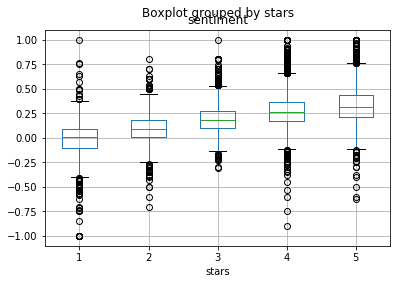

In [70]:
# Box plot of sentiment grouped by stars
yelp.boxplot(column='sentiment', by='stars')

In [94]:
# Reviews with most positive sentiment
yelp[yelp.sentiment == 1].text.head()

254    Our server Gary was awesome. Food was amazing....
347    3 syllables for this place. \r\nA-MAZ-ING!\r\n...
420                                    LOVE the food!!!!
459    Love it!!! Wish we still lived in Arizona as C...
679                                     Excellent burger
Name: text, dtype: object

In [95]:
# Reviews with most negative sentiment
yelp[yelp.sentiment == -1].text.head()

773     This was absolutely horrible. I got the suprem...
1517                  Nasty workers and over priced trash
3266    Absolutely awful... these guys have NO idea wh...
4766                                       Very bad food!
5812        I wouldn't send my worst enemy to this place.
Name: text, dtype: object

In [96]:
# Widen the column display.
pd.set_option('max_colwidth', 500)

In [97]:
# Negative sentiment in a 5-star review
yelp[(yelp.stars == 5) & (yelp.sentiment < -0.3)].head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length,sentiment
390,106JT5p8e8Chtd0CZpcARw,2009-08-06,KowGVoP_gygzdSu6Mt3zKQ,5,"RIP AZ Coffee Connection. :( I stopped by two days ago unaware that they had closed. I am severely bummed. This place is irreplaceable! Damn you, Starbucks and McDonalds!",review,jKeaOrPyJ-dI9SNeVqrbww,1,0,0,175,-0.302083


In [98]:
# Positive sentiment in a 1-star review
yelp[(yelp.stars == 1) & (yelp.sentiment > 0.5)].head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length,sentiment
1781,53YGfwmbW73JhFiemNeyzQ,2012-06-22,Gi-4O3EhE175vujbFGDIew,1,If you like the stuck up Scottsdale vibe this is a good place for you. The food isn't impressive. Nice outdoor seating.,review,Hqgx3IdJAAaoQjvrUnbNvw,0,1,2,119,0.766667


In [71]:
# Reset the column display width.
pd.reset_option('max_colwidth')

<a id='add_feat'></a>
## Bonus: Adding Features to a Document-Term Matrix

Here, we will add additional features to our `CountVectorizer()`-generated feature set to hopefully improve our model.

To make the best models, you will want to supplement the auto-generated features with new features you think might be important. After all, `CountVectorizer()` typically lowercases text and removes all associations between words. Or, you may have metadata to add in addition to just the text.

> Remember: Although you may have hundreds of thousands of features, each data point is extremely sparse. So, if you add in a new feature, e.g., one that detects if the text is all capital letters, this new feature can still have a huge effect on the model outcome!

In [72]:
# Create a DataFrame that only contains the 5-star and 1-star reviews.
yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]

# define X and y
feature_cols = ['text', 'sentiment', 'cool', 'useful', 'funny']
X = yelp_best_worst[feature_cols]
y = yelp_best_worst.stars

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [73]:
# Use CountVectorizer with text column only.
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train.text)
X_test_dtm = vect.transform(X_test.text)
print((X_train_dtm.shape))
print((X_test_dtm.shape))

(3064, 16825)
(1022, 16825)


In [74]:
# Shape of other four feature columns
X_train.drop('text', axis=1).shape

(3064, 4)

In [75]:
# Cast other feature columns to float and convert to a sparse matrix.
extra = sp.sparse.csr_matrix(X_train.drop('text', axis=1).astype(float))
extra.shape

(3064, 4)

In [76]:
# Combine sparse matrices.
X_train_dtm_extra = sp.sparse.hstack((X_train_dtm, extra))
X_train_dtm_extra.shape

(3064, 16829)

In [77]:
# Repeat for testing set.
extra = sp.sparse.csr_matrix(X_test.drop('text', axis=1).astype(float))
X_test_dtm_extra = sp.sparse.hstack((X_test_dtm, extra))
X_test_dtm_extra.shape

(1022, 16829)

In [78]:
# Use logistic regression with text column only.
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train_dtm, y_train)
y_pred_class = logreg.predict(X_test_dtm)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.9246575342465754


In [79]:
# Use logistic regression with all features.
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train_dtm_extra, y_train)
y_pred_class = logreg.predict(X_test_dtm_extra)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.9207436399217221


<a id='more_textblob'></a>
## Bonus: Fun TextBlob Features

In [80]:
# Spelling correction
TextBlob('15 minuets late').correct()

TextBlob("15 minutes late")

In [81]:
# Spellcheck
Word('parot').spellcheck()

[('part', 0.9929478138222849), ('parrot', 0.007052186177715092)]

In [82]:
# Definitions
Word('bank').define('v')

['tip laterally',
 'enclose with a bank',
 'do business with a bank or keep an account at a bank',
 'act as the banker in a game or in gambling',
 'be in the banking business',
 'put into a bank account',
 'cover with ashes so to control the rate of burning',
 'have confidence or faith in']

In [83]:
# Language identification
TextBlob('Hola amigos').detect_language()

'es'

In [84]:
# Language identification
TextBlob('Xu Yihui').detect_language()

'zh-CN'

<a id="bayes"></a>

## Appendix: Intro to Naive Bayes and Text Classification

Later in the course, we will explore in-depth how to use the Naive Bayes classifier with text. Naive Bayes is a very popular classifier because it has minimal storage requirements, is fast, can be tuned easily with more data, and has found very useful applications in text classificaton. For example, Paul Graham originally proposed using Naive Bayes to detect spam in his [Plan for Spam](http://www.paulgraham.com/spam.html).

Earlier we experimented with text classification using a Naive Bayes model. What exactly are Naive Bayes classifiers? 

**What is Bayes?**  
Bayes, or Bayes' Theorem, is a different way to assess probability. It considers prior information in order to more accurately assess the situation.

**Example:** You are playing roulette.

As you approach the table, you see that the last number the ball landed on was Red-3. With a frequentist mindset, you know that the ball is just as likely to land on Red-3 again given that every slot on the wheel has an equal opportunity of 1 in 37.

Given that you started believing that the ball can land in each slot with an equal likelihood _and_ that you have only seen one throw previously, you rationally believe that there would be no difference between picking Red a second time now or picking Black -- ideally they would happen with the same likelihood!

However, as you sit and watch the roulette table, you begin to notice something strange. The ball is _always_ landing on red. Every single time the ball is thrown, it lands in a red slot. Even though your past beliefs stated that red and black were equally likely, every time it lands in red, you change those beliefs a little more towards a biased roulette table. 

This is what Bayes is all about — adjusting probabilities as more data is gathered!

Below is the equation for Bayes.  

$$P(A \ | \ B) = \frac {P(B \ | \ A) \times P(A)} {P(B)}$$

- **$P(A \ | \ B)$** : Probability of `Event A` occurring given `Event B` has occurred.
- **$P(B \ | \ A)$** : Probability of `Event B` occurring given `Event A` has occurred.
- **$P(A)$** : Probability of `Event A` occurring.
- **$P(B)$** : Probability of `Event B` occurring.



## Applying Naive Bayes Classification to Spam Filtering

Let's pretend we have an email with three words: "Send money now." We'll use Naive Bayes to classify it as **ham or spam.** ("Ham" just means not spam. It can include emails that look like spam but that you opt into!)

$$P(spam \ | \ \text{send money now}) = \frac {P(\text{send money now} \ | \ spam) \times P(spam)} {P(\text{send money now})}$$

By assuming that the features (the words) are conditionally independent, we can simplify the likelihood function:

$$P(spam \ | \ \text{send money now}) \approx \frac {P(\text{send} \ | \ spam) \times P(\text{money} \ | \ spam) \times P(\text{now} \ | \ spam) \times P(spam)} {P(\text{send money now})}$$

Note that each conditional probability in the numerator is easily calculated directly from the training data!

So, we can calculate all of the values in the numerator by examining a corpus of spam email:

$$P(spam \ | \ \text{send money now}) \approx \frac {0.2 \times 0.1 \times 0.1 \times 0.9} {P(\text{send money now})} = \frac {0.0018} {P(\text{send money now})}$$

We would repeat this process with a corpus of ham email:

$$P(ham \ | \ \text{send money now}) \approx \frac {0.05 \times 0.01 \times 0.1 \times 0.1} {P(\text{send money now})} = \frac {0.000005} {P(\text{send money now})}$$

All we care about is whether spam or ham has the higher probability, and so we predict that the email is spam.


### Key Takeaways

- The "naive" assumption of Naive Bayes (that the features are conditionally independent) is critical to making these calculations simple. For featires that are correlated with each in a big way probabilities are calculated differently.
- The normalization constant (the denominator) can be ignored since it's the same for all classes.
- The prior probability is much less relevant once you have a lot of features.

### Comparing Naive Bayes With Other Models

Advantages of Naive Bayes:

- Model training and prediction are very fast.
- It's somewhat interpretable.
- No tuning is required.
- Features don't need scaling.
- It's insensitive to irrelevant features (with enough observations).
- It performs better than logistic regression when the training set is very small.

Disadvantages of Naive Bayes:

- If "spam" is dependent on non-independent combinations of individual words, it may not work well.
- Predicted probabilities are not well calibrated.
- Correlated features can be problematic (due to the independence assumption).
- It can't handle negative features (with Multinomial Naive Bayes).
- It has a higher "asymptotic error" than logistic regression.

-----

<a id='conclusion'></a>
## Conclusion

- NLP is a gigantic field.
- Understanding the basics broadens the types of data you can work with.
- Simple techniques go a long way.
- Use scikit-learn for NLP whenever possible.

While we used SKLearn and TextBlob today, another popular python NLP library is [Spacy](https://spacy.io).